In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from scipy.spatial.distance import cosine
import random


In [37]:
# img_path : img1_path 와 img2_path 구분없이 할당할 모든 이미지 
# img1_path : 입력한 이미지
# img2_path : 랜덤하게 뽑힌 비교할 이미지

class ImageSimilarityCalculator:
    def __init__(self):
        self.img2_path_list = []
        self.similarity_list = []
        self.best_index_list = []
        self.img2_best_path_list = []
    
    # 각각의 이미지 경로 가져오는 함수
    def get_image_path(self, image_path, style, img1_path, num=50):
        '''
        image_path : 파일 경로
        style : 입력될 스타일 종류
        img1_path : 업로드한 이미지 경로
        num : 가져올 이미지 개수    
        '''  
        path = os.path.join(image_path, style)
        img_list = os.listdir(path)
        random_img_list = random.sample(img_list, num)
        
        # 특정 style 이미지 경로를 가져와 img2_path_list 에 추가
        for img_name in random_img_list:
            img2_path = os.path.join(path, img_name)
            self.img2_path_list.append(img2_path)
            
        return self.calculate_similarity(img1_path)

    # 이미지 유사도 파악하는 함수
    def calculate_similarity(self, img1_path):
        '''
        img1_path : 입력한 이미지 경로
        '''
        
        for img2_path in self.img2_path_list:
            similarity = self.image_similarity(img1_path, img2_path)
            self.similarity_list.append(similarity)

        return self.top_10()

    def top_10(self):
        sorted_list = sorted(self.similarity_list, reverse=True)
        top_11 = sorted_list[:11]
        
        # 자기자신 제외하기 위해
        top_10 = top_11[1:]
        print(top_10)
        return self.get_top10_index(top_10)
    
    # top10의 인덱스값 추출
    def get_top10_index(self, top_10):
        for i in top_10:
            for similarity in self.similarity_list:
                if i == similarity:
                    self.best_index_list.append(self.similarity_list.index(similarity))
        return self.top10_path()

    # top10의 이미지 주소
    def top10_path(self):
        for best_index in self.best_index_list:
            self.img2_best_path_list.append(self.img2_path_list[best_index])
        return self.show_images()

    # 이미지 전처리
    def preprocess_image(self, img_path):
        # PIL 이미지 로드 후 크기 조정
        img = image.load_img(img_path, target_size=(224, 224))
        
        # 이미지 np 배열로 변환
        img_array = image.img_to_array(img) 
        
        # 배열의 차원 확장 (244,244,3)->(1,244,244,3)
        img_array = np.expand_dims(img_array, axis=0) 
        
        img_preprocessed = preprocess_input(img_array) 
        
        return img_preprocessed
    
    # 이미지 특징 추출
    def extract_features(self, img_path):
        # vgg16 모델 불러오기 , 모델의 최상단 분류층 포함x
        base_model = VGG16(weights='imagenet', include_top=False) 
        
        # block5_pool : VGG16의 마지막 풀링 레이어
        model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)
        
        # preprocess_image 함수 사용
        preprocessed_img = self.preprocess_image(img_path)
        
        features = model.predict(preprocessed_img)
        
        return features.flatten()
    
    # 이미지간 유사성 계산
    def image_similarity(self, img1_path, img2_path):
        # 입력된 이미지 특징 
        features1 = self.extract_features(img1_path)
        
        # 랜덤하게 뽑힌 저장된 이미지 특징 추출
        features2 = self.extract_features(img2_path)
        
        # 두 특징간의 코사인 유사도 사용하여 유사성 파악 (1에 가까울수록 유사함)
        similarity = 1 - cosine(features1, features2)
        return similarity

    # 이미지 출력
    def show_images(self):
        fig, axes = plt.subplots(1, 10, figsize=(15, 5))

        for i, image_path in enumerate(self.img2_best_path_list):
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')

        plt.show()


# 이미지 경로

In [38]:
img1_path = "./image(원본)/american/americancasual_23991.jpg"
style = "american"
image_path = './image_nuggi(누끼)/men/'

# class 실행

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 391ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

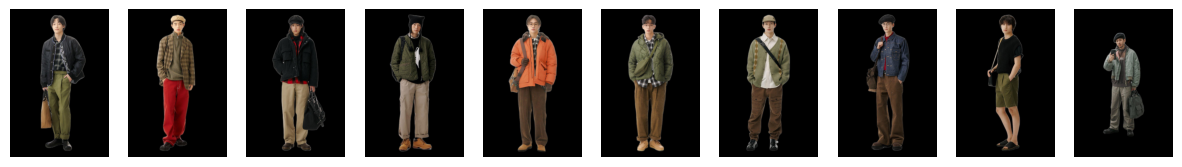

In [39]:
calculator = ImageSimilarityCalculator()
calculator.get_image_path(image_path, style, img1_path)

# 개선된 코드

In [1]:
class ImageSimilarityCalculator:
    def __init__(self):
        self.img2_path_list = []
        self.similarity_list = []
        self.best_index_list = []
        self.img2_best_path_list = []
        self.base_model = None  
        self.features1 = None  # 이미지 1의 특징을 저장할 변수
    
    # 각각의 이미지 경로 가져오는 함수
    def get_image_path(self, image_path, style, img1_path, num=100):
        path = os.path.join(image_path, style)
        img_list = os.listdir(path)
        random_img_list = random.sample(img_list, num)
        
        # 특정 style 이미지 경로를 가져와 img2_path_list 에 추가
        for img_name in random_img_list:
            img2_path = os.path.join(path, img_name)
            self.img2_path_list.append(img2_path)
            
        # 이미지 1의 특징 추출
        self.features1 = self.extract_features(img1_path)
            
        return self.calculate_similarity()
    
    # 기존에서 이부분 변경
    # 이미지 유사도 파악하는 함수
    def calculate_similarity(self):
        
        # 이미지 유사성 파악을 병렬로 진행
        with concurrent.futures.ThreadPoolExecutor() as executor:
            futures = []             
            for img2_path in self.img2_path_list:
                futures.append(executor.submit(self.image_similarity, img2_path))
            for future in concurrent.futures.as_completed(futures):
                
                self.similarity_list.append(future.result())

        return self.top_10()

    def top_10(self):
        sorted_list = sorted(self.similarity_list, reverse=True)
        top_11 = sorted_list[:11]
        
        # 자기자신 제외하기 위해
        top_10 = top_11[1:]
        print(top_10)
        return self.get_top10_index(top_10)
    
    # top10의 인덱스값 추출
    def get_top10_index(self, top_10):
        for i in top_10:
            for similarity in self.similarity_list:
                if i == similarity:
                    self.best_index_list.append(self.similarity_list.index(similarity))
        return self.top10_path()

    # top10의 이미지 주소
    def top10_path(self):
        for best_index in self.best_index_list:
            self.img2_best_path_list.append(self.img2_path_list[best_index])
        return self.show_images()

    # 이미지 전처리
    def preprocess_image(self, img_path):
        # PIL 이미지 로드 후 크기 조정
        img = image.load_img(img_path, target_size=(224, 224))
        
        # 이미지 np 배열로 변환
        img_array = image.img_to_array(img) 
        
        # 배열의 차원 확장 (244,244,3)->(1,244,244,3)
        img_array = np.expand_dims(img_array, axis=0) 
        
        # preprocess_input : img_array를 resnet50에 적합한 형식으로 전처리
        img_preprocessed = preprocess_input(img_array) 
        
        return img_preprocessed
    
     # 모델 초기화
    def init_model(self):
        if self.base_model is None:
            self.base_model = ResNet50(weights='imagenet', include_top=False)
    
    # 이미지 특징 추출
    def extract_features(self, img_path):
        
        self.init_model()  # 모델 초기화
        
        # preprocess_image 함수 사용
        preprocessed_img = self.preprocess_image(img_path)
        
        features = self.base_model.predict(preprocessed_img)
        
        return features.flatten()
    
    # 이미지간 유사성 계산
    def image_similarity(self, img2_path):       
        
        # 랜덤하게 뽑힌 저장된 이미지 특징 추출
        features2 = self.extract_features(img2_path)
        
        # 두 특징간의 코사인 유사도 사용하여 유사성 파악 (1에 가까울수록 유사함)
        similarity = 1 - cosine(self.features1, features2)
        return similarity

    # 이미지 출력
    def show_images(self):
        fig, axes = plt.subplots(1, 10, figsize=(15, 5))

        for i, image_path in enumerate(self.img2_best_path_list):
            img = mpimg.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis('off')

        plt.show()


In [ ]:
%%time
img1_path = "./누끼.jpg"
style = "street"
image_path = './image_nuggi(누끼)/men/'

calculator = ImageSimilarityCalculator()
calculator.get_image_path(image_path, style, img1_path)

In [ ]:
# 비슷한 이미지를 보여주는데 VGG19 보다 Resnet 50이 속도가 더 빨랐으며 성능 또한 우수하다고 판단
# 코사인 맨하탄, 유클리드 세가지 유사도 측정 방법 중 코사인을 채택(성능은 비슷 하였지만 속도가 가장 빠름)
# 이전 클래스 문 실행 속도는 2분이 걸림
# 이미지간 유사성을 계산하는 함수에 데이터를 병렬로 전달 해주어 실행속도를 12초 까지 낮춤

In [ ]:
img1_path = f"{img1_path}"
style = f"{predicted_class_label}"
image_path = f'./image_nuggi(누끼)/women/'

# img_path : img1_path 와 img2_path 구분없이 할당할 모든 이미지 
# img1_path : 입력한 이미지
# img2_path : 랜덤하게 뽑힌 비교할 이미지

class ImageSimilarityCalculator:
    def __init__(self):
        self.img2_path_list = []
        self.similarity_list = []
        self.best_index_list = []
        self.img2_best_path_list = []
        self.base_model = None  
        self.features1 = None  # 이미지 1의 특징을 저장할 변수

    
    # 각각의 이미지 경로 가져오는 함수
    def get_image_path(self, image_path, style, img1_path, num=400): 
        path = os.path.join(image_path, style)                        
        img_list = os.listdir(path)                         
        random_img_list = random.sample(img_list, num)       
        
        # 특정 style 이미지 경로를 가져와 img2_path_list 에 추가
        for img_name in random_img_list: 
            img2_path = os.path.join(path, img_name)        
            self.img2_path_list.append(img2_path)          

            
        # 이미지 1의 특징 추출
        self.features1 = self.extract_features(img1_path)
            
        return self.calculate_similarity()
    
    # 이미지 유사도 파악하는 함수
    def calculate_similarity(self):
        
        # 이미지 유사성 파악을 병렬로 진행
        with concurrent.futures.ThreadPoolExecutor() as executor:
            futures = []
            
            # 병렬로 진행하면 입력되는 순서대로 저장 되지 않기 때문에 인덱스와 같이 저장
            for index, img2_path in enumerate(self.img2_path_list):
                futures.append(executor.submit(self.image_similarity, index, img2_path))
            for future in concurrent.futures.as_completed(futures):
                self.similarity_list.append(future.result())                

        return self.top_10()

    def top_10(self):        
        # x[1] : 유사도 기준으로 내림 차순으로 정렬
        sorted_similarity_with_index = sorted(self.similarity_list, key=lambda x: x[1], reverse=True) 
                
        # 10개 추려서 top_10_with_index에 저장
        top_10_with_index = sorted_similarity_with_index[:10]
        
        
        # top_10_with_index에서 index 값들만 추려서 top_10_indices에 저장
        top_10_indices = [index for index, _ in top_10_with_index]
        
        self.best_index_list = top_10_indices
                
        return self.top10_path()
    

    # top10의 이미지 주소
    def top10_path(self):
        for best_index in self.best_index_list:
            img_path = self.img2_path_list[best_index]
            self.img2_best_path_list.append(img_path) 

        return self.show_images()

    # 이미지 전처리
    def preprocess_image(self, img_path):
        # PIL 이미지 로드 후 크기 조정
        img = image.load_img(img_path, target_size=(224, 224))
        
        # 이미지 np 배열로 변환
        img_array = image.img_to_array(img) 
        
        # 배열의 차원 확장 (244,244,3)->(1,244,244,3)
        img_array = np.expand_dims(img_array, axis=0) 
        
        # preprocess_input : img_array를 resnet50에 적합한 형식으로 전처리
        img_preprocessed = preprocess_input(img_array) 
        
        return img_preprocessed
    
     # 모델 초기화
    def init_model(self):
        if self.base_model is None:
            self.base_model = ResNet50(weights='imagenet', include_top=False)
    
    # 이미지 특징 추출
    def extract_features(self, img_path):
        
        self.init_model()  # 모델 초기화
        
        # preprocess_image 함수 사용
        preprocessed_img = self.preprocess_image(img_path)
        
        features = self.base_model.predict(preprocessed_img)
        
        return features.flatten()
    
    # 이미지간 유사성 계산
    def image_similarity(self, index, img2_path):       
        
        # 랜덤하게 뽑힌 저장된 이미지 특징 추출
        features2 = self.extract_features(img2_path)
        
        # 두 특징간의 코사인 유사도 사용하여 유사성 파악 (1에 가까울수록 유사함)
        similarity = 1 - cosine(self.features1, features2)
        return index, similarity
    

    def show_images(self):  
        # SQLite 데이터베이스 파일 경로
        db_path = r'C:\Users\ITSC\Desktop\PMF_DB구현\PMF.db'
        
        # SQLite 데이터베이스에 연결
        conn = sqlite3.connect(db_path)
        
        img_id_list = []
        
        for image_path in self.img2_best_path_list:
            # 이미지 id 값 가져오기
            img_id = (image_path.split("_")[-1]).split(".")[0]
            img_id_list.append(img_id)
        
        # 리스트는 못 읽어서 튜플로 변환하여 쿼리에 사용
        img_id_tuple = tuple(img_id_list)

        # 쿼리 작성
        query = f"SELECT rowid, url FROM women_style_all WHERE style_id IN {img_id_tuple}"

        # 쿼리 실행 및 결과 가져오기
        cursor = conn.execute(query)
        
        img_url_list = []
        # 결과 처리
        for row in cursor:
            row_id, url = row
            img_url_list.append(url)
            
        print(img_url_list[0])
        # 연결 종료
        conn.close()
        return img_url_list
                     
calculator = ImageSimilarityCalculator()
calculator.get_image_path(image_path, style, img1_path)

In [ ]:
# 웹에서 사용가능하도록 이미지를 plt.show로 출력하는 부분을 
# db에서 해당하는 이미지 url을 끌어올 수 있도록 변경 